In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 df = pd.read_csv('/content/drive/MyDrive/Python/mymoviedb.csv',engine="python")
 df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [ ]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [ ]:
 #• Exploration Summary
 #• we have a dataframe consisting of 9827 rows and 9 columns.
 #• our dataset looks a bit tidy with no NaNs nor duplicated values.
 #• Release_Date column needs to be casted into date time and to extract only the
# Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
 #• there is noticable outliers in Popularity column
 #• Vote_Average bettter be categorised for proper analysis.
 # Data Cleaning
 #• Genre column has comma saperated values and white spaces that needs to be hand#

In [ ]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), object(7)
memory usage: 691.8+ KB


In [ ]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], downcast='integer', errors='coerce')


In [ ]:
 df['Release_Date'] = pd.to_datetime(df['Release_Date'],errors='coerce')
 # confirming changes
 print(df['Release_Date'].dtypes)
 df['Release_Date'] = df['Release_Date'].dt.year
 df['Release_Date'].dtypes

datetime64[ns]


dtype('float64')

In [ ]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [ ]:
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [ ]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """
    edges = [df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
 # categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
 # confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [ ]:
 df['Genre'] = df['Genre'].str.split(', ')
 # explode the lists
 df = df.explode('Genre').reset_index(drop=True)
 df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


In [ ]:
 # showing stats. on genre column
 df['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


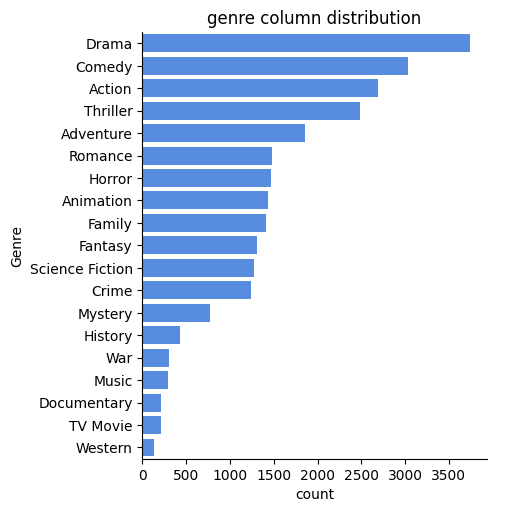

In [ ]:
 sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
 color = '#4287f5')
 plt.title('genre column distribution')
 plt.show()

In [ ]:
 sns.catplot(x = 'Genre', data = df,y='Vote_Average' kind = 'count',
order = df['Genre'].value_counts().index,
 color = '#4287f5')
 plt.title('genre column distribution')
 plt.show(

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-20-0deefa66a0e2>, line 1)